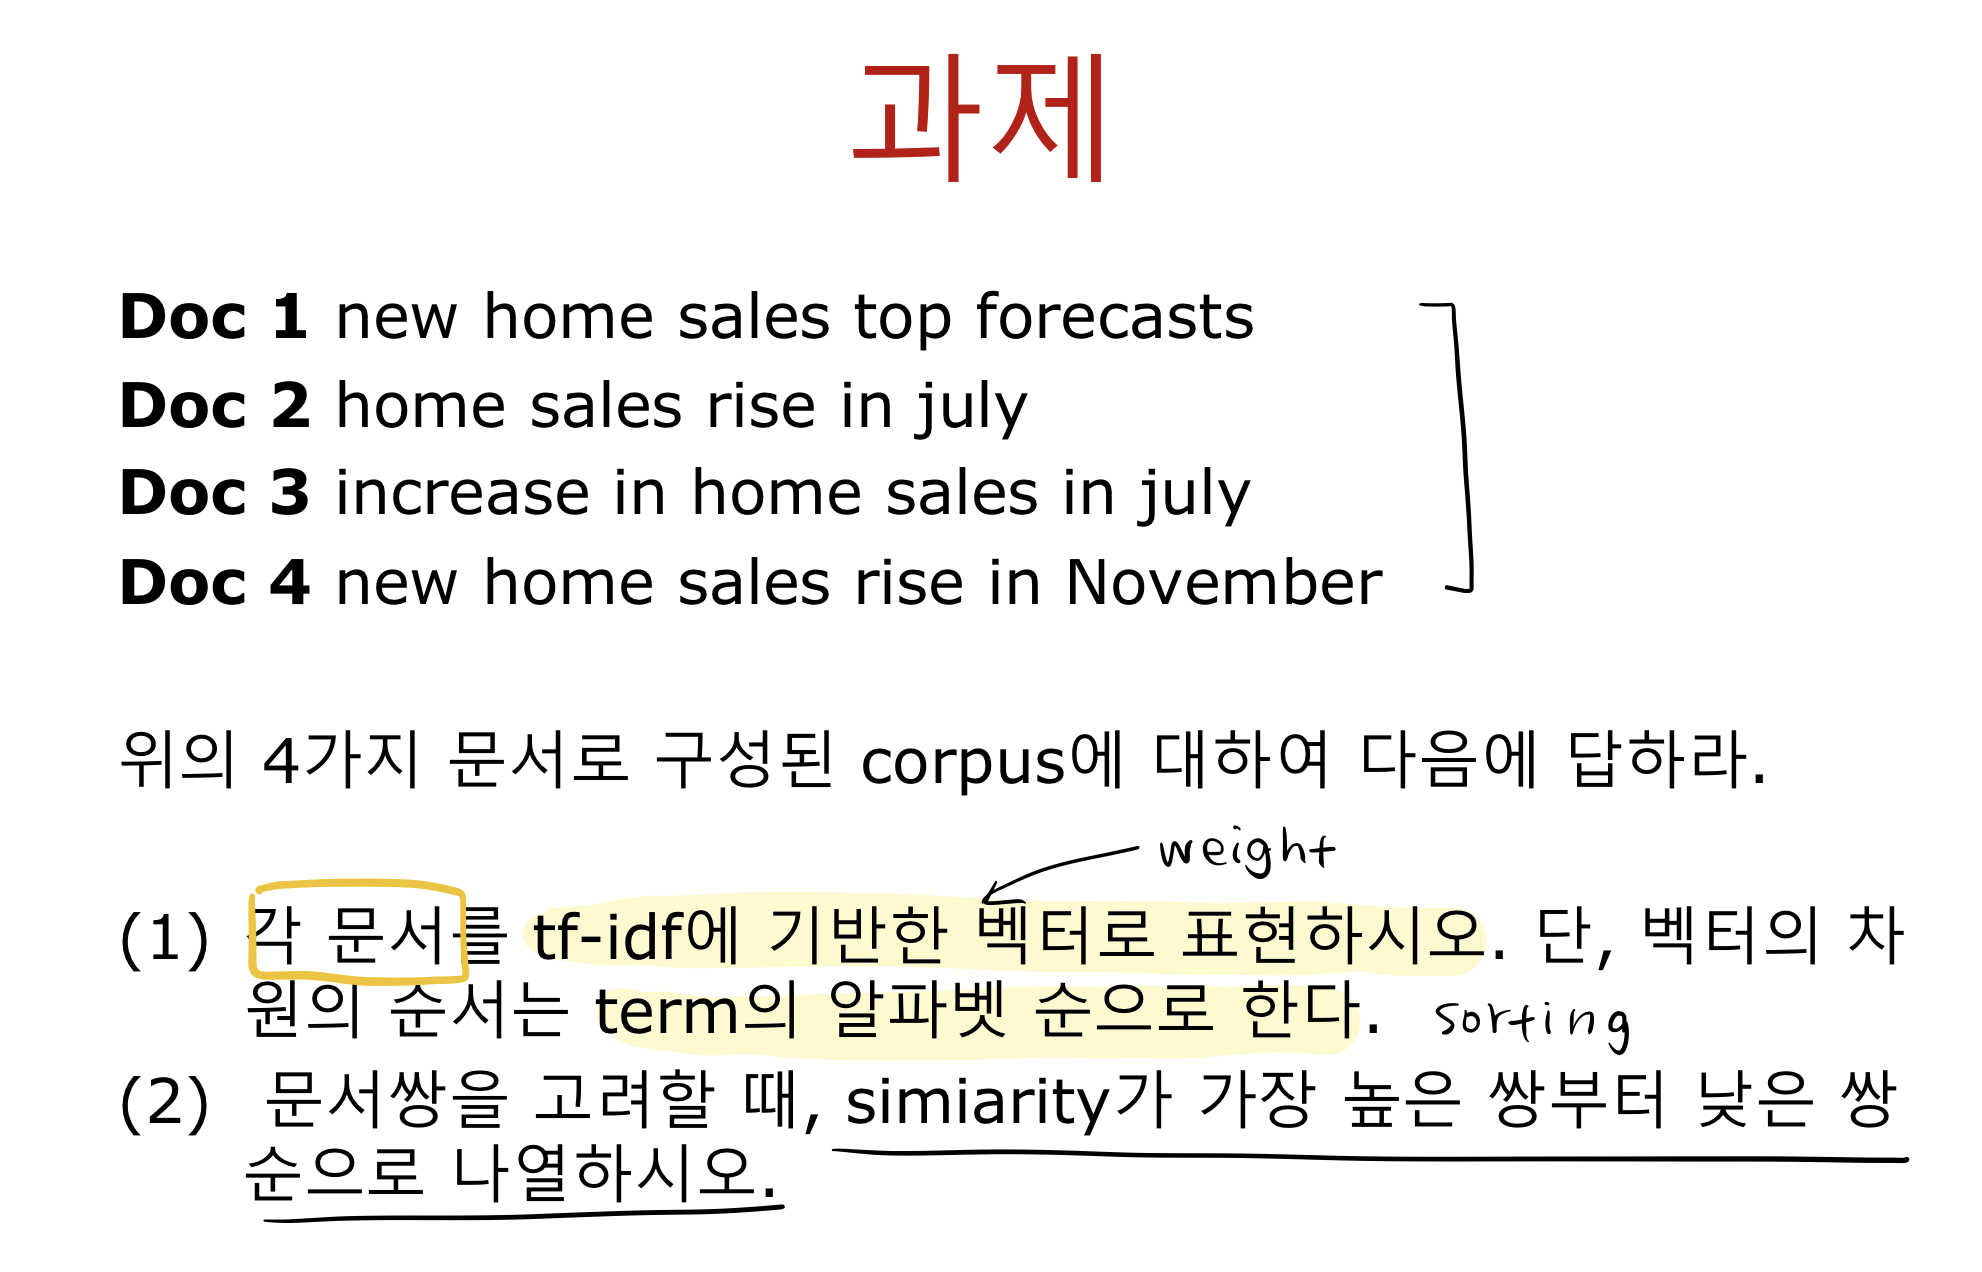

In [27]:
# ready
import pandas as pd
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
# documents
doc1 = 'new home sales top forecasts'
doc2 = 'home sales rise in july'
doc3 = 'increase in home sales in july'
doc4 = 'new home sales rise in November'

### Q1. 각 문서를 tf-idf 에 기반한 벡터로 표현하시오. 단, 벡터의 차원의 순서는 term의 알파벳 순으로 한다.

In [3]:
# document -> list -> count
from collections import Counter
df_doc1 = Counter(sorted(doc1.lower().split(' ')))
df_doc2 = Counter(sorted(doc2.lower().split(' ')))
df_doc3 = Counter(sorted(doc3.lower().split(' ')))
df_doc4 = Counter(sorted(doc4.lower().split(' ')))

df_doc1 = pd.DataFrame.from_dict(df_doc1,orient='index',columns=['tf_doc1'])
df_doc2 = pd.DataFrame.from_dict(df_doc2,orient='index',columns=['tf_doc2'])
df_doc3 = pd.DataFrame.from_dict(df_doc3,orient='index',columns=['tf_doc3'])
df_doc4 = pd.DataFrame.from_dict(df_doc4,orient='index',columns=['tf_doc4'])

In [4]:
# merge
df = pd.merge(df_doc1, df_doc2, left_index=True, right_index=True,how='outer')
df = pd.merge(df, df_doc3, left_index=True, right_index=True,how='outer')
df = pd.merge(df, df_doc4, left_index=True, right_index=True,how='outer')
df.columns=['tf_doc1','tf_doc2','tf_doc3','tf_doc4']

df

,tf_doc1,tf_doc2,tf_doc3,tf_doc4
forecasts,1.0,NaN,NaN,NaN
home,1.0,1.0,1.0,1.0
in,NaN,1.0,2.0,1.0
increase,NaN,NaN,1.0,NaN
july,NaN,1.0,1.0,NaN
new,1.0,NaN,NaN,1.0
november,NaN,NaN,NaN,1.0
rise,NaN,1.0,NaN,1.0
sales,1.0,1.0,1.0,1.0
top,1.0,NaN,NaN,NaN


In [5]:
df['df'] = df.iloc[:,:4].notnull().sum(axis=1)
df['idf'] = np.log(4/df.df)    # n=4
df = df.fillna(0)
df

,tf_doc1,tf_doc2,tf_doc3,tf_doc4,df,idf
forecasts,1.0,0.0,0.0,0.0,1,1.386294
home,1.0,1.0,1.0,1.0,4,0.000000
in,0.0,1.0,2.0,1.0,3,0.287682
increase,0.0,0.0,1.0,0.0,1,1.386294
july,0.0,1.0,1.0,0.0,2,0.693147
new,1.0,0.0,0.0,1.0,2,0.693147
november,0.0,0.0,0.0,1.0,1,1.386294
rise,0.0,1.0,0.0,1.0,2,0.693147
sales,1.0,1.0,1.0,1.0,4,0.000000
top,1.0,0.0,0.0,0.0,1,1.386294


In [6]:
# 각 문서별 tfidf 값
df['tf_doc1'] = df.tf_doc1 * df.idf
df['tf_doc2'] = df.tf_doc2 * df.idf
df['tf_doc3'] = df.tf_doc3 * df.idf
df['tf_doc4'] = df.tf_doc4 * df.idf

df.columns=['tfidf_doc1','tfidf_doc2','tfidf_doc3','tfidf_doc4','df','idf']
df = df.sort_index()     #sort_values(by=df.index, axis=0, ascending=True)
df

,tfidf_doc1,tfidf_doc2,tfidf_doc3,tfidf_doc4,df,idf
forecasts,1.386294,0.000000,0.000000,0.000000,1,1.386294
home,0.000000,0.000000,0.000000,0.000000,4,0.000000
in,0.000000,0.287682,0.575364,0.287682,3,0.287682
increase,0.000000,0.000000,1.386294,0.000000,1,1.386294
july,0.000000,0.693147,0.693147,0.000000,2,0.693147
new,0.693147,0.000000,0.000000,0.693147,2,0.693147
november,0.000000,0.000000,0.000000,1.386294,1,1.386294
rise,0.000000,0.693147,0.000000,0.693147,2,0.693147
sales,0.000000,0.000000,0.000000,0.000000,4,0.000000
top,1.386294,0.000000,0.000000,0.000000,1,1.386294


### Q2. 문서쌍을 고려할 때, similarity가 가장 높은 쌍부터 낮은 쌍 순으로 나열 하시오

##### document 문서쌍 고려
(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)

In [10]:
doc_matrix = df.transpose()
doc_matrix

,forecasts,home,in,increase,july,new,november,rise,sales,top
tfidf_doc1,1.386294,0.0,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.0,1.386294
tfidf_doc2,0.000000,0.0,0.287682,0.000000,0.693147,0.000000,0.000000,0.693147,0.0,0.000000
tfidf_doc3,0.000000,0.0,0.575364,1.386294,0.693147,0.000000,0.000000,0.000000,0.0,0.000000
tfidf_doc4,0.000000,0.0,0.287682,0.000000,0.000000,0.693147,1.386294,0.693147,0.0,0.000000
df,1.000000,4.0,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,4.0,1.000000
idf,1.386294,0.0,0.287682,1.386294,0.693147,0.693147,1.386294,0.693147,0.0,1.386294


In [30]:
doc1_vector = np.array(doc_matrix.iloc[0,:])#.reshape(1,10)
doc2_vector = np.array(doc_matrix.iloc[1,:])
doc3_vector = np.array(doc_matrix.iloc[2,:])
doc4_vector = np.array(doc_matrix.iloc[3,:])

print(doc1_vector)
print(doc2_vector)
print(doc3_vector)
print(doc4_vector)

[1.38629436 0.         0.         0.         0.         0.69314718
 0.         0.         0.         1.38629436]
[0.         0.         0.28768207 0.         0.69314718 0.
 0.         0.69314718 0.         0.        ]
[0.         0.         0.57536414 1.38629436 0.69314718 0.
 0.         0.         0.         0.        ]
[0.         0.         0.28768207 0.         0.         0.69314718
 1.38629436 0.69314718 0.         0.        ]


In [31]:
# 코사인 유사도
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [32]:
print(cos_sim(doc1_vector,doc2_vector))
print(cos_sim(doc1_vector,doc3_vector))
print(cos_sim(doc1_vector,doc4_vector))
print(cos_sim(doc2_vector,doc3_vector))
print(cos_sim(doc2_vector,doc4_vector))
print(cos_sim(doc3_vector,doc4_vector))

0.0
0.0
0.13417041886321496
0.3824638095519218
0.3201437486397687
0.05813849686125315
